### Imports

In [1]:
import numpy as np

# Add models here
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

# Sklearn imports for processing and evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Plotting
from matplotlib import pyplot as plt

# Misc
import time
from tqdm import tqdm

### Load Data

In [2]:
x_train = np.loadtxt("./uci_har_dataset/train/X_train.txt")
y_train = np.loadtxt("./uci_har_dataset/train/y_train.txt")

x_test = np.loadtxt("./uci_har_dataset/test/X_test.txt")
y_test = np.loadtxt("./uci_har_dataset/test/y_test.txt")

### Combine Data

In [3]:
combined_x = np.concatenate((x_train, x_test))
combined_y = np.concatenate((y_train, y_test))

assert combined_x.shape[0] == x_train.shape[0] + x_test.shape[0]
assert combined_y.shape[0] == y_train.shape[0] + y_test.shape[0]

### KFold

In [4]:
def do_kfold_pca(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        start = time.time()
        model.fit(transformed, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        preds = model.predict(test_transform)
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

### Plot Results and Timing

In [5]:
def plot_results(results, times):
    # Get means
    acc_mean = np.mean(results, axis=1)
    acc_stds = np.std(results, axis=1)
    time_mean = np.mean(times, axis=1)
    time_stds = np.std(times, axis=1)

    # Plot prediction accuracies
    fig, ax = plt.subplots()
    ax.plot(num_features, acc_mean)
    ax.fill_between(num_features, acc_mean+acc_stds, acc_mean-acc_stds, alpha=0.3)
    ax.set(title="Prediction Accuracies", xlabel="Number of PCA Components", ylabel="Prediction Acciracy")
    plt.show()

    # Plot timing
    fig, ax = plt.subplots()
    ax.plot(num_features, time_mean)
    ax.fill_between(num_features, time_mean+time_stds, time_mean-time_stds, alpha=0.3)
    ax.set(title="Training Time", xlabel="Number of PCA Components", ylabel="Time (s)")
    plt.show()

### Training for Different Number of PCA Components GradientBoostingClassifier

In [6]:
# Number of PCA Components
num_features = [1,2,3,4,5,10,20,50]

results = []
times = []
for features in num_features:
    pred_accuracy, fit_times = do_kfold_pca(GradientBoostingClassifier(n_estimators=10), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

10it [00:03,  2.73it/s]


1 FEATURES PREDICTION ACCURACY: 0.452 $\pm$ 0.039


10it [00:04,  2.11it/s]


2 FEATURES PREDICTION ACCURACY: 0.542 $\pm$ 0.055


10it [00:05,  1.67it/s]


3 FEATURES PREDICTION ACCURACY: 0.626 $\pm$ 0.054


10it [00:07,  1.42it/s]


4 FEATURES PREDICTION ACCURACY: 0.734 $\pm$ 0.030


10it [00:08,  1.22it/s]


5 FEATURES PREDICTION ACCURACY: 0.770 $\pm$ 0.028


10it [00:14,  1.46s/it]


10 FEATURES PREDICTION ACCURACY: 0.780 $\pm$ 0.035


10it [00:26,  2.67s/it]


20 FEATURES PREDICTION ACCURACY: 0.787 $\pm$ 0.028


10it [01:03,  6.36s/it]

50 FEATURES PREDICTION ACCURACY: 0.795 $\pm$ 0.028


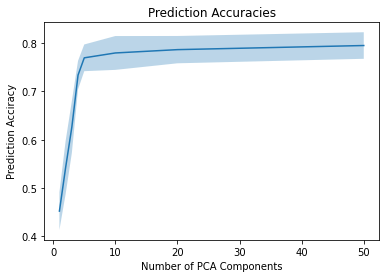

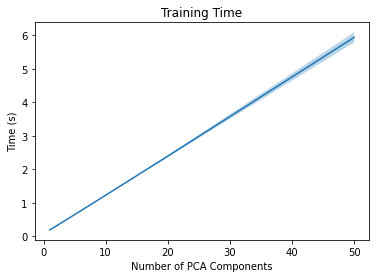

In [7]:
plot_results(results, times)

In [8]:
model = GradientBoostingClassifier(n_estimators=10)
model.fit(x_train, y_train)
print("BASELINE GRADIENTBOOSTINGCLASSIFIER ACCURACY: {}".format(model.score(x_test, y_test)))

BASELINE GRADIENTBOOSTINGCLASSIFIER ACCURACY: 0.8917543264336614


### Training for Different Number of PCA Components RandomForestClassifier

In [9]:
# Num### Training for Different Number of PCA Components RandomForestClassifierber of PCA Components
num_features = [1,2,3,4,5,10,20,50]

results = []
times = []
for features in num_features:
    pred_accuracy, fit_times = do_kfold_pca(RandomForestClassifier(n_estimators=10), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

10it [00:02,  4.00it/s]


1 FEATURES PREDICTION ACCURACY: 0.382 $\pm$ 0.017


10it [00:02,  4.00it/s]


2 FEATURES PREDICTION ACCURACY: 0.518 $\pm$ 0.033


10it [00:02,  4.12it/s]


3 FEATURES PREDICTION ACCURACY: 0.634 $\pm$ 0.053


10it [00:02,  3.42it/s]


4 FEATURES PREDICTION ACCURACY: 0.741 $\pm$ 0.024


10it [00:02,  3.70it/s]


5 FEATURES PREDICTION ACCURACY: 0.763 $\pm$ 0.034


10it [00:03,  2.68it/s]


10 FEATURES PREDICTION ACCURACY: 0.806 $\pm$ 0.032


10it [00:04,  2.28it/s]


20 FEATURES PREDICTION ACCURACY: 0.826 $\pm$ 0.025


10it [00:06,  1.47it/s]

50 FEATURES PREDICTION ACCURACY: 0.843 $\pm$ 0.020


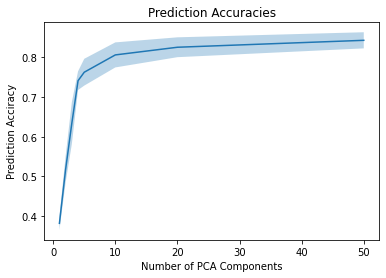

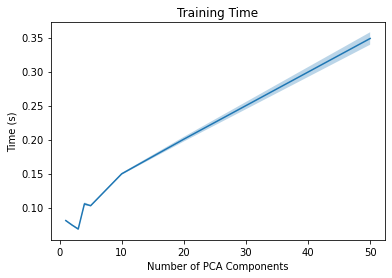

In [10]:
plot_results(results, times)

In [11]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)
print("BASELINE RANDOMFORESTLASSIFIER ACCURACY: {}".format(model.score(x_test, y_test)))

BASELINE RANDOMFORESTLASSIFIER ACCURACY: 0.9107567017305734
